Un graphe montrant le spectre du signal avec les fréquences en kHz sur l’axe X et la puissance en dB sur l’axe Y.

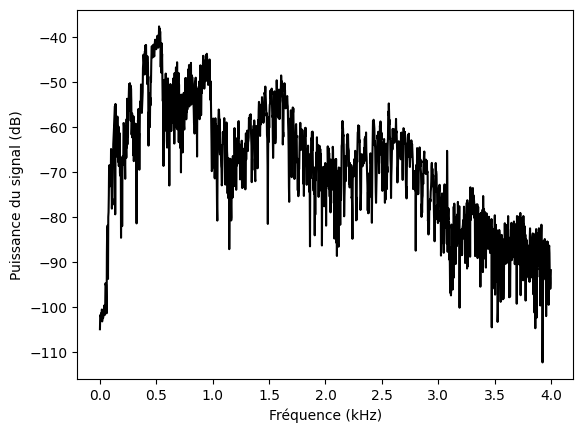

In [8]:
import numpy as np 
import matplotlib.pyplot as plt  
from scipy.io import wavfile

sampling_freq, signal = wavfile.read('spoken_word.wav')

signal = signal / np.power(2, 15)

 # Extraire la longueur du signal audio 
len_signal = len(signal)

# Extraire la demi-longueur 
len_half = int(np.ceil((len_signal + 1) / 2.0))

# Appliquer la transformée de Fourier  
freq_signal = np.fft.fft(signal)
# ABS valeur absolue 

freq_signal = np.abs(freq_signal[0:len_half]) / len_signal

# Prendre le carré 
freq_signal **= 2

 # Extraire la longueur du signal transformé de Fourier 
len_fts = len(freq_signal)

if len_signal % 2:
    freq_signal[1:len_fts] *= 2 
else:
    freq_signal[1:len_fts-1] *= 2

signal_power = 10 * np.log10(freq_signal)

 # Construire l'axe des X 
x_axis = np.arange(0, len_half, 1) * (sampling_freq / len_signal) / 1000.0
x_axis

 # Tracer la figure 
plt.figure() 
plt.plot(x_axis, signal_power, color='black') 
plt.xlabel('Fréquence (kHz)') 
plt.ylabel('Puissance du signal (dB)') 
plt.show()
